# **1. 외래객 입국-목적별/국적별**

* 2020.01 ~ 2021.12 데이터 : [https://kosis.kr/statHtml/statHtml.do?orgId=314&tblId=DT_TGT_ENT_AGG_MONTH&conn_path=I2](https://kosis.kr/statHtml/statHtml.do?orgId=314&tblId=DT_TGT_ENT_AGG_MONTH&conn_path=I2)
* 2022.01 ~ 2022.09 데이터 : [https://kosis.kr/statHtml/statHtml.do?orgId=314&tblId=DT_TRD_TGT_ENT_AGG_MONTH&conn_path=I2](https://kosis.kr/statHtml/statHtml.do?orgId=314&tblId=DT_TRD_TGT_ENT_AGG_MONTH&conn_path=I2)
* 시점, 행렬전환, 조회설정을 통해 데이터 형태를 조금 변경
* 관련기사 : [11월부터 일본·대만 관광객 몰려오나…관광업계 기대감 ↑](https://www.news1.kr/articles/4838814)

### 1.1 코로나19시기 외래객의 수는 어느정도 였을까? 방역수칙이 완화되면서 어느 나라 외래객이 많이 들어올까?
* 외래객 : 세계관광기구(UNWTO) 권고안에 근거하여 방문객(visitor) 기준으로 작성하는데, 법무부 자료 중에서 외국인 입국자와 재외국민 입국자, 선원 ㆍ 승무원을 합한 것임. 단, 방한 외국인 입국자 중에서 외교, 군인, 영주, 영주가족, 방문동거, 거주 체류자격의 외국인 입국자는 방문객으로 볼 수 없어서 제외함

    ※ 법무부의 ‘입국자’는 외국인 입국자와 국민 입국자이며, ‘외국인 입국자’는 국적이 한국이 아닌 자로 선원ㆍ승무원은 별도로 발표하고 있음 
* e: 추정치, p: 잠정치, -: 자료없음, ...: 미상자료, x: 비밀보호, ▽: 시계열 불연속

# **2. 필요 라이브러리 가져오기**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
!pip install koreanize-matplotlib

import koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 3.7 MB/s 


# **3. 데이터 로드하기**

In [13]:
# 2020 ~ 2021년 데이터
df_2021 = pd.read_csv('/content/drive/MyDrive/data/외래객_입국목적별_국적별_20221122195626.csv', encoding = "cp949")

# 2022년 데이터
df_2022 = pd.read_csv('/content/drive/MyDrive/data/외래객_입국목적별_국적별_20221122200002.csv', encoding = "cp949")

In [17]:
df_2021.shape

(7800, 5)

In [18]:
df_2022.shape

(2768, 5)

# **4. 분석과 시각화를 위해 데이터 합치기**

In [23]:
# 2020 ~ 2022년 데이터 만들기
df = pd.concat([df_2021, df_2022], ignore_index = True)

df.shape

(10568, 5)

In [24]:
df.head()

,국적별(1),국적별(2),시점,항목,데이터
0,아시아주,소계,2020.01,관광,906808
1,아시아주,소계,2020.01,상용,10490
2,아시아주,소계,2020.01,공용,1420
3,아시아주,소계,2020.01,유학연수,18495
4,아시아주,소계,2020.01,기타,144016


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10568 entries, 0 to 10567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   국적별(1)  10568 non-null  object 
 1   국적별(2)  10568 non-null  object 
 2   시점      10568 non-null  float64
 3   항목      10568 non-null  object 
 4   데이터     10568 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 412.9+ KB


# **5. 데이터 전처리**

In [33]:
print(df["국적별(1)"].unique())
print(df["국적별(2)"].unique())
print(df["시점"].unique())
print(df["항목"].unique())
print(df["데이터"].unique())

['아시아주' '미주' '구주' '대양주' '아프리카' '기타' '교포']
['소계' '중국' '일본' '대만' '홍콩' '마카오' '필리핀' '인도네시아' '태국' '베트남' '인도' '말레이시아'
 '싱가포르' '몽골' '우즈베키스탄' '미얀마' 'GCC' '카자흐스탄' '터키' '캄보디아' '스리랑카' '방글라데시'
 '파키스탄' '이스라엘' '이란' '아시아 기타' '미국' '캐나다' '브라질' '멕시코' '미주 기타' '러시아' '영국'
 '독일' '프랑스' '이탈리아' '네덜란드' '우크라이나' '스페인' '루마니아' '노르웨이' '스웨덴' '폴란드' '스위스'
 '포르투갈' '오스트리아' '핀란드' '벨기에' '크로아티아' '그리스' '불가리아' '덴마크' '아일랜드' '구주 기타'
 '오스트레일리아' '뉴질랜드' '대양주 기타' '남아프리카공화국' '아프리카 기타' '국적미상' '교포' '튀르키예']
[2020.01 2020.02 2020.03 2020.04 2020.05 2020.06 2020.07 2020.08 2020.09
 2020.1  2020.11 2020.12 2021.01 2021.02 2021.03 2021.04 2021.05 2021.06
 2021.07 2021.08 2021.09 2021.1  2021.11 2021.12 2022.01 2022.02 2022.03
 2022.04 2022.05 2022.06 2022.07 2022.08 2022.09]
['관광' '상용' '공용' '유학연수' '기타']
[906808  10490   1420 ...   2384   2319   3269]


* 국적별(1) : 지역을 나타내는 것 같으므로 지역별로 변경하는 것이 좋아보인다. 기타, 교포는 빼도 될 것 같다.
* 국적별(2) : 다양한 나라를 나태내는 것 같으므로 나라별로 변경하는 것이 좋아보인다. 소계는 합계를 의미하므로 제외하는 것이 좋을 것 같다.
* 시점 : 추후 연도와 월로 나누어야 할 것 같다.
* 항목 : 외래객이 한국온 목적을 나타내는 것이므로 목적으로 변경하는 것이 좋아보인다.
* 데이터 : 단위가 명이므로 명으로 변경하는 것이 좋아보인다.

### 5.1 컬러명 바꿔주기

In [112]:
# 국적별(1) -> 지역별 / 국적별(2) -> 나라별 / 항목 -> 목적 / 데이터 -> 명으로 컬러명 변경
df_new = df.copy() # 원본 데이터 보호

df_new = df_new.rename(columns = {"국적별(1)" : "지역별", "국적별(2)" : "나라별", "항목" : "목적", "데이터" : "명"})

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10568 entries, 0 to 10567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역별     10568 non-null  object 
 1   나라별     10568 non-null  object 
 2   시점      10568 non-null  float64
 3   목적      10568 non-null  object 
 4   명       10568 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 412.9+ KB


### 5.2 불필요한 데이터 제거하기

#### 5.2.1 지역별에서 불필요한 데이터 제거

In [113]:
df_new["지역별"].value_counts()

아시아주    4255
구주      3908
미주       990
대양주      649
아프리카     493
기타       144
교포       129
Name: 지역별, dtype: int64

In [114]:
df_new[df_new["지역별"] == "기타"]["나라별"].value_counts()

국적미상    144
Name: 나라별, dtype: int64

In [115]:
df_new[df_new["지역별"] == "교포"]["나라별"].value_counts()

교포    129
Name: 나라별, dtype: int64

* 지역별에서 기타와 교포는 국적미상인 지역과 교포들로 이루어져 있기 때문에 제거해준다.

In [116]:
# 지역별에서 기타와 교포 제외하기
df_new = df_new[(df_new["지역별"] != "기타") & (df_new["지역별"] != "교포")].copy()
df_new

,지역별,나라별,시점,목적,명
0,아시아주,소계,2020.01,관광,906808
1,아시아주,소계,2020.01,상용,10490
2,아시아주,소계,2020.01,공용,1420
3,아시아주,소계,2020.01,유학연수,18495
4,아시아주,소계,2020.01,기타,144016
...,...,...,...,...,...
10530,아프리카,아프리카 기타,2022.09,관광,1085
10531,아프리카,아프리카 기타,2022.09,상용,294
10532,아프리카,아프리카 기타,2022.09,공용,77
10533,아프리카,아프리카 기타,2022.09,유학연수,281


#### 5.2.2 나라별에서 불필요한 데이터 제거

In [117]:
df_new["나라별"].value_counts()

소계          825
독일          165
아시아 기타      165
미국          165
캐나다         165
브라질         165
멕시코         165
중국          165
러시아         165
영국          165
프랑스         165
방글라데시       165
이탈리아        165
네덜란드        165
스페인         165
스웨덴         165
폴란드         165
구주 기타       165
오스트레일리아     165
아프리카 기타     165
파키스탄        165
미주 기타       165
필리핀         165
몽골          165
인도네시아       165
태국          165
베트남         165
말레이시아       165
싱가포르        165
인도          165
GCC         165
카자흐스탄       165
일본          165
우즈베키스탄      164
루마니아        164
스위스         164
대만          164
이란          164
캄보디아        164
남아프리카공화국    163
우크라이나       163
뉴질랜드        163
벨기에         163
핀란드         163
아일랜드        162
덴마크         162
그리스         162
스리랑카        162
이스라엘        162
미얀마         162
홍콩          161
불가리아        160
노르웨이        160
오스트리아       159
포르투갈        158
대양주 기타      156
크로아티아       153
마카오         147
터키          120
튀르키예         45
Name: 나라별, dtype: int64

* 소계는 합계를 의미하므로 시각화할 때 유의미한 결과를 보기 어렵기 때문에 제거해준다.

In [118]:
# 나라별에서 소계 제외하기
df_new = df_new[df_new["나라별"] != "소계"].copy()
df_new

,지역별,나라별,시점,목적,명
120,아시아주,중국,2020.01,관광,393336
121,아시아주,중국,2020.01,상용,2813
122,아시아주,중국,2020.01,공용,99
123,아시아주,중국,2020.01,유학연수,10433
124,아시아주,중국,2020.01,기타,75000
...,...,...,...,...,...
10530,아프리카,아프리카 기타,2022.09,관광,1085
10531,아프리카,아프리카 기타,2022.09,상용,294
10532,아프리카,아프리카 기타,2022.09,공용,77
10533,아프리카,아프리카 기타,2022.09,유학연수,281


### 5.3 터기 -> 튀르키예로 변경

* 2022년에 터키가 튀르키예로 명칭이 바뀌면서 2021년까지의 데이터에는 터키로 되어 있다. 그러므로 튀르키예로 바꿔 분석하는데 용히하게 변경해주어야 할 것 같다.

In [119]:
# 터키 -> 튀르키예로 값 변경
df_new = df_new.replace("터키", "튀르키예")

df_new["나라별"].value_counts()

중국          165
방글라데시       165
아시아 기타      165
미국          165
캐나다         165
브라질         165
멕시코         165
일본          165
러시아         165
영국          165
독일          165
프랑스         165
이탈리아        165
네덜란드        165
스페인         165
스웨덴         165
폴란드         165
구주 기타       165
오스트레일리아     165
파키스탄        165
미주 기타       165
아프리카 기타     165
몽골          165
필리핀         165
인도네시아       165
태국          165
인도          165
말레이시아       165
싱가포르        165
베트남         165
GCC         165
카자흐스탄       165
튀르키예        165
우즈베키스탄      164
이란          164
스위스         164
대만          164
루마니아        164
캄보디아        164
남아프리카공화국    163
뉴질랜드        163
우크라이나       163
핀란드         163
벨기에         163
그리스         162
아일랜드        162
덴마크         162
스리랑카        162
이스라엘        162
미얀마         162
홍콩          161
불가리아        160
노르웨이        160
오스트리아       159
포르투갈        158
대양주 기타      156
크로아티아       153
마카오         147
Name: 나라별, dtype: int64

### 5.4 시점에서 연도, 월 분리하기

In [132]:
# 시점 컬럼 타입 변경
df_new = df_new.astype({"시점" : 'string'})

# 연도 컬럼 생성
df_new["연도"] = df_new["시점"].map(lambda x : int(x.split('.')[0]))

# 월 컬럼 생성
df_new["월"] = df_new["시점"].map(lambda x : str(x.split('.')[1]))

df_new.head()

,지역별,나라별,시점,목적,명,연도,월
120,아시아주,중국,2020.01,관광,393336,2020,01
121,아시아주,중국,2020.01,상용,2813,2020,01
122,아시아주,중국,2020.01,공용,99,2020,01
123,아시아주,중국,2020.01,유학연수,10433,2020,01
124,아시아주,중국,2020.01,기타,75000,2020,01


In [133]:
df_new["월"].value_counts()

07    865
09    864
08    863
01    860
05    860
06    858
02    854
04    854
03    852
1     580
11    580
12    580
Name: 월, dtype: int64

In [136]:
# 1 -> 10으로 값 변경
df_new = df_new.replace("1", "10")

df_new["월"].value_counts()

07    865
09    864
08    863
01    860
05    860
06    858
02    854
04    854
03    852
10    580
11    580
12    580
Name: 월, dtype: int64

# **6. 외래객 시각화**

### 6.1 지역별 연도별 외래객 합계 구하기

In [140]:
result = df_new.pivot_table(index = "지역별", columns = "연도", values = "명", aggfunc = "sum")
result

연도,2020,2021,2022
지역별,,,
구주,215973,148320,259714
대양주,30607,5709,37397
미주,271667,241969,416833
아시아주,1962305,547756,972883
아프리카,14473,12186,19189


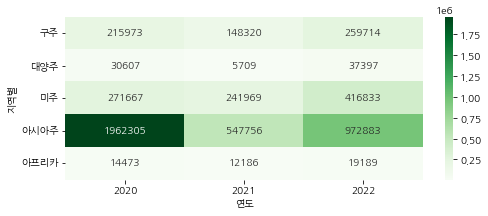

In [142]:
# 시각화
plt.figure(figsize = (8,3))
sns.heatmap(result, cmap = "Greens", annot = True, fmt=".0f")

* 코로나19가 시작된지 얼마 안된 시점인 2020년에는 전체적으로 외래객이 많았는데 코로나 19가 한창 심했던 2021년에는 모든 지역의 외래객이 크게 감소하였다.
* 2022년은 9월까지 합산된 값임에도 불구하고 2021년에 비해 많은 수의 외래객이 있다.
* 특히 아시아주에 나라들이 한국을 많이 방문하는 것으로 보여진다. 

### 6.2 아시아주의 나라별 연도별 외래객 합계 구하기

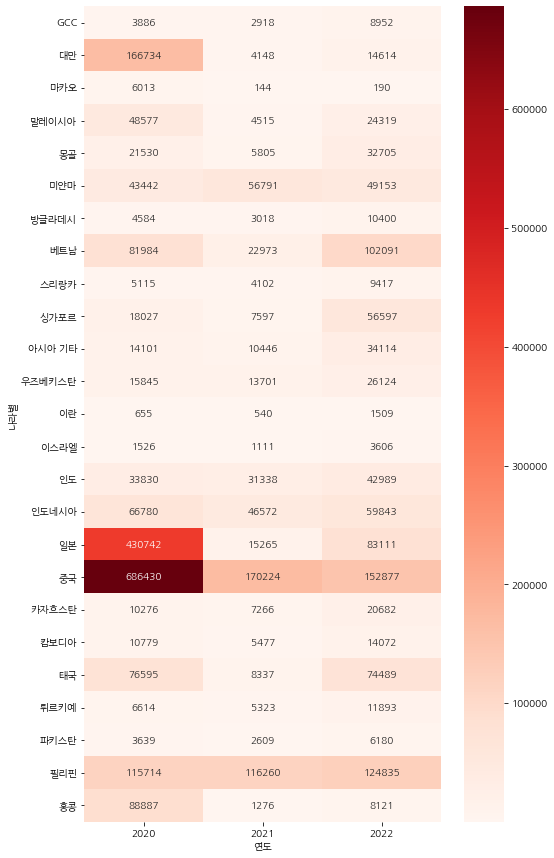

In [145]:
# 아시아주 데이터
df_asia = df_new[df_new["지역별"] == "아시아주"].copy()

result = df_asia.pivot_table(index = "나라별", columns = "연도", values = "명", aggfunc = "sum")
result

# 시각화
plt.figure(figsize = (8,15))
sns.heatmap(result, cmap = "Reds", annot = True, fmt=".0f")

* 2020년에는 중국 > 일본 > 대만 순서로 외래객이 많았으며 특히 중국과 일본은 상당한 수의 외래객이 있었다.
* 2021년에는 전체적으로 감소했지만 필리핀, 미얀마는 소폭 증가했다. 이유는??
* 2022년은 9월까지는 중국 > 필리핀 > 베트남 순으로 외래객이 많지만 기사에서 언급된 일본, 대만 또한 2021년에 비해 증가했고 더 증가될 것 같다.

### 6.3 주요 국가(중국, 일본, 대만, 필리핀, 베트남)에 대해 목적별 2022년의 월별 외래객 합계를 시각화하기

In [146]:
# 2022년 주요 국가 외래객 데이터 추출

df_top5 = df_asia[df_asia["나라별"].isin(["중국","일본","대만","필리핀","베트남"])].copy()
df_top5

,지역별,나라별,시점,목적,명,연도,월
120,아시아주,중국,2020.01,관광,393336,2020,01
121,아시아주,중국,2020.01,상용,2813,2020,01
122,아시아주,중국,2020.01,공용,99,2020,01
123,아시아주,중국,2020.01,유학연수,10433,2020,01
124,아시아주,중국,2020.01,기타,75000,2020,01
...,...,...,...,...,...,...,...
8222,아시아주,베트남,2022.09,관광,10195,2022,09
8223,아시아주,베트남,2022.09,상용,698,2022,09
8224,아시아주,베트남,2022.09,공용,341,2022,09
8225,아시아주,베트남,2022.09,유학연수,3785,2022,09


In [147]:
df_top5 = df_top5[df_top5["연도"].isin([2022])].copy()
df_top5

,지역별,나라별,시점,목적,명,연도,월
7845,아시아주,중국,2022.01,관광,1641,2022,01
7846,아시아주,중국,2022.01,상용,170,2022,01
7847,아시아주,중국,2022.01,공용,8,2022,01
7848,아시아주,중국,2022.01,유학연수,264,2022,01
7849,아시아주,중국,2022.01,기타,7406,2022,01
...,...,...,...,...,...,...,...
8222,아시아주,베트남,2022.09,관광,10195,2022,09
8223,아시아주,베트남,2022.09,상용,698,2022,09
8224,아시아주,베트남,2022.09,공용,341,2022,09
8225,아시아주,베트남,2022.09,유학연수,3785,2022,09


<Figure size 1080x432 with 0 Axes>

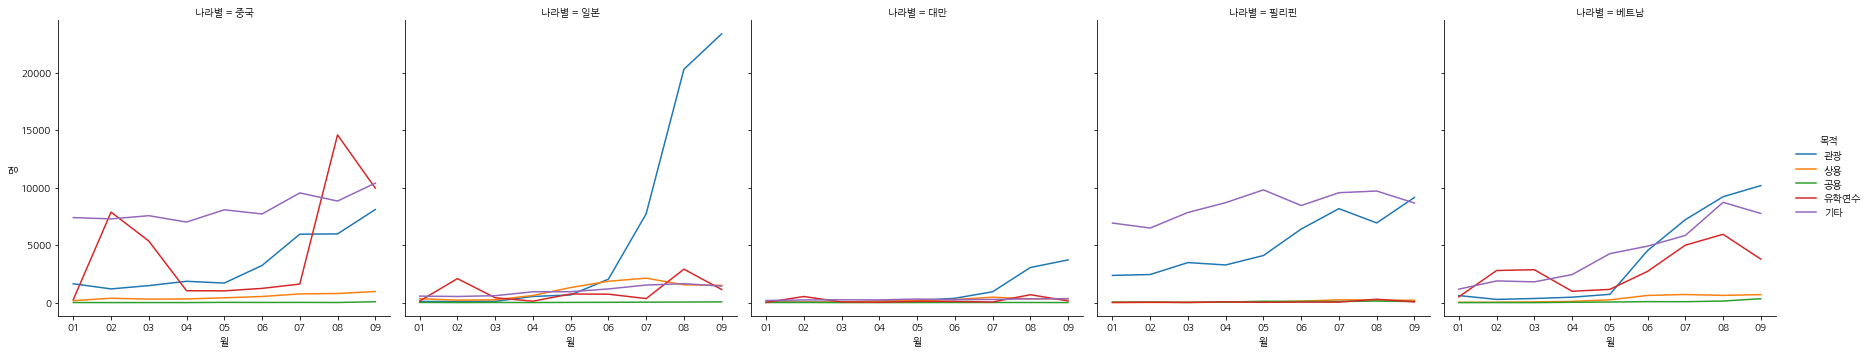

In [148]:
plt.figure(figsize = (15,6))
sns.relplot(data = df_top5, x = "월", y = "명", hue = "목적", kind = 'line', col = "나라별")

* 관광을 목적으로 한국에 오는 외래객이 가장 많은 나라는 일본이다.
* 중국 같은 경우 관광을 목적으로 온 외래객도 증가하고 있지만 유학연수로 오는 사람도 많고 기타 다른 목적으로 오는 사람도 많다.
* 대만도 다른 목적에 비해 관광을 목적으로 오는 방한객이 크게 증가하였다.
* 기사에 언급한 내용대로 관광과 관련해서는 일본과 대만이 9월까지 크게 증가하는 모습이고 아마 11월까지도 계속 증가할 것 같다. -> 2020년, 2021년 데이터를 가지고 일본, 대만 사람들이 겨울에 더 많이 오는지 보면 좋은 근거를 찾을 수 있을 것 같다.
* 기사에서 언급한 일본, 대만을 제외하고 베트남과 필리핀 외래객을 위한 프로그램도 준비하면 좋을 것 같다.

